In [1]:
!pip install anndata

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
import anndata as ad

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#set destination folder inside google drive
dest_dir = "/content/drive/My Drive/Colab Notebooks/BIX/datasets/kidney"

In [5]:
#create folder if it doesn't exit
import os
os.makedirs(dest_dir, exist_ok=True)

In [6]:
#download file to folder
url = "https://datasets.cellxgene.cziscience.com/46274517-0999-4bd5-a59d-9e2f25aa5d52.h5ad"
outfile = os.path.join(dest_dir, "kidney_cellxgene.h5ad")


In [7]:
#!wget -O "$outfile" "$url"

In [8]:
adata = ad.read_h5ad(dest_dir + "/kidney_cellxgene.h5ad")

In [9]:
adata

AnnData object with n_obs × n_vars = 225177 × 30635
    obs: 'orig.ident', 'nCount_RNA', 'SpecimenID', 'LibraryID', 'SampleID', 'Run', 'clusterNumber', 'subclass.l1', 'dataSource', 'diseasetype', 'Race', 'clusterClass', 'assay_ontology_term_id', 'sampletype', 'disease_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'Age_binned', 'cell_type_ontology_term_id', 'author_cell_type', 'diabetes_history', 'hypertension', 'eGFR', 'is_primary_data', 'disease_category', 'nFeature_RNA', 'percent.mt', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'index', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'default_embedding', 'organism', 'organism_ontology_term_id', 'sche

In [10]:
adata.obs.T

,S2008000605HRT_AAACCCAGTGCACATT-1,S2008000605HRT_AAACCCAGTGCCTACG-1,S2008000605HRT_AAAGAACGTAGAGACC-1,S2008000605HRT_AAAGAACGTCGGAACA-1,S2008000605HRT_AAAGAACGTTAACAGA-1,S2008000605HRT_AAAGGATAGTCATCCA-1,S2008000605HRT_AAAGGATGTTGTAGCT-1,S2008000605HRT_AAAGGATTCTGGACTA-1,S2008000605HRT_AAAGGGCAGCCTTTGA-1,S2008000605HRT_AAAGTCCTCCATCTCG-1,...,Sample1162EO2_TTTGACTGTCGCCACA-1,Sample1162EO2_TTTGATCAGTTGCCTA-1,Sample1162EO2_TTTGATCGTGAGTAGC-1,Sample1162EO2_TTTGATCGTGTGGTCC-1,Sample1162EO2_TTTGATCTCTCCTGCA-1,Sample1162EO2_TTTGGAGAGCAGGCAT-1,Sample1162EO2_TTTGGAGAGTCGCGAA-1,Sample1162EO2_TTTGGAGAGTGCTCGC-1,Sample1162EO2_TTTGGAGGTGATACTC-1,Sample1162EO2_TTTGGTTCAGTAGAAT-1
orig.ident,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,...,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2
nCount_RNA,10505.0,9698.0,1540.0,4958.0,6141.0,10770.0,5830.0,9450.0,3926.0,8273.0,...,16853.0,2020.0,2440.0,22151.0,23246.0,10499.0,3354.0,5811.0,15384.0,11192.0
SpecimenID,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,...,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2
LibraryID,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,...,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2
SampleID,163-3,163-3,163-3,163-3,163-3,163-3,163-3,163-3,163-3,163-3,...,108,108,108,108,108,108,108,108,108,108
Run,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,...,1162,1162,1162,1162,1162,1162,1162,1162,1162,1162
clusterNumber,2,2,11,2,2,2,2,2,11,2,...,4,3,8,2,7,2,8,3,7,4
subclass.l1,PC,PC,VSMC/MC/FIB,PC,PC,PC,PC,PC,VSMC/MC/FIB,PC,...,TAL,PT,EC,PC,IC,PC,EC,PT,IC,TAL
dataSource,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,...,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH
diseasetype,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,...,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference


In [11]:
#check dtypes of obs terms
adata.obs.dtypes

,0
orig.ident,category
nCount_RNA,float64
SpecimenID,category
LibraryID,category
SampleID,category
Run,category
clusterNumber,category
subclass.l1,category
dataSource,category
diseasetype,category


In [12]:
# we would expect obs terms clusterNumber to be int32 not a string term. Let's change that

In [13]:
adata.obs.clusterNumber = (
    pd.to_numeric(adata.obs.clusterNumber, errors="coerce").astype("float64"))


In [14]:
adata.obs.dtypes

,0
orig.ident,category
nCount_RNA,float64
SpecimenID,category
LibraryID,category
SampleID,category
Run,category
clusterNumber,float64
subclass.l1,category
dataSource,category
diseasetype,category


In [15]:
#check for null values
adata.obs.isnull().sum()

,0
orig.ident,0
nCount_RNA,0
SpecimenID,0
LibraryID,0
SampleID,0
Run,0
clusterNumber,0
subclass.l1,0
dataSource,0
diseasetype,0


In [16]:
#look at disease and disease_category
adata.obs.disease.value_counts()

,count
disease,
chronic kidney disease,130630
acute kidney failure,51167
normal,43380


In [17]:
adata.obs.disease_category.value_counts()

,count
disease_category,
CKD,130630
AKI,51167
Healthy_living_donor,36961
Healthy_stone_donor,6419


In [18]:
#our target variable will be the combination of CKD and AKI into one unhealthy category labeled "yes"
# the healthy will also be combined into a "no" class
adata.obs["unhealthy"] = (
    adata.obs.disease_category.isin(["AKI", "CKD"])
    .astype("bool")
)

In [19]:
#adata.obs['unhealthy'] = adata.obs['unhealthy'].astype(bool)

In [20]:
adata.obs.T

,S2008000605HRT_AAACCCAGTGCACATT-1,S2008000605HRT_AAACCCAGTGCCTACG-1,S2008000605HRT_AAAGAACGTAGAGACC-1,S2008000605HRT_AAAGAACGTCGGAACA-1,S2008000605HRT_AAAGAACGTTAACAGA-1,S2008000605HRT_AAAGGATAGTCATCCA-1,S2008000605HRT_AAAGGATGTTGTAGCT-1,S2008000605HRT_AAAGGATTCTGGACTA-1,S2008000605HRT_AAAGGGCAGCCTTTGA-1,S2008000605HRT_AAAGTCCTCCATCTCG-1,...,Sample1162EO2_TTTGACTGTCGCCACA-1,Sample1162EO2_TTTGATCAGTTGCCTA-1,Sample1162EO2_TTTGATCGTGAGTAGC-1,Sample1162EO2_TTTGATCGTGTGGTCC-1,Sample1162EO2_TTTGATCTCTCCTGCA-1,Sample1162EO2_TTTGGAGAGCAGGCAT-1,Sample1162EO2_TTTGGAGAGTCGCGAA-1,Sample1162EO2_TTTGGAGAGTGCTCGC-1,Sample1162EO2_TTTGGAGGTGATACTC-1,Sample1162EO2_TTTGGTTCAGTAGAAT-1
orig.ident,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,S2008000605HRT,...,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2,Sample1162EO2
nCount_RNA,10505.0,9698.0,1540.0,4958.0,6141.0,10770.0,5830.0,9450.0,3926.0,8273.0,...,16853.0,2020.0,2440.0,22151.0,23246.0,10499.0,3354.0,5811.0,15384.0,11192.0
SpecimenID,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,S-2008-000605-HRT,...,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2,Sample1162-EO2
LibraryID,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,5655_EO-2,...,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2,1162-EO-2
SampleID,163-3,163-3,163-3,163-3,163-3,163-3,163-3,163-3,163-3,163-3,...,108,108,108,108,108,108,108,108,108,108
Run,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,5655_EO,...,1162,1162,1162,1162,1162,1162,1162,1162,1162,1162
clusterNumber,2.0,2.0,11.0,2.0,2.0,2.0,2.0,2.0,11.0,2.0,...,4.0,3.0,8.0,2.0,7.0,2.0,8.0,3.0,7.0,4.0
subclass.l1,PC,PC,VSMC/MC/FIB,PC,PC,PC,PC,PC,VSMC/MC/FIB,PC,...,TAL,PT,EC,PC,IC,PC,EC,PT,IC,TAL
dataSource,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,KPMP,...,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH,UMICH
diseasetype,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,...,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference,Reference


In [21]:
adata.obs.disease_category.value_counts()

,count
disease_category,
CKD,130630
AKI,51167
Healthy_living_donor,36961
Healthy_stone_donor,6419


In [22]:
adata.obs.unhealthy.value_counts()

,count
unhealthy,
True,181797
False,43380


Train Test Split

In [23]:
idx = np.arange(adata.n_obs)
y = adata.obs.unhealthy.values

train_idx, test_idx = train_test_split(
    idx,
    test_size=0.2,
    stratify=y,
    random_state=42,
    shuffle=True
)

adata_train = adata[train_idx].copy()
adata_test = adata[test_idx].copy()

In [24]:
adata_train

AnnData object with n_obs × n_vars = 180141 × 30635
    obs: 'orig.ident', 'nCount_RNA', 'SpecimenID', 'LibraryID', 'SampleID', 'Run', 'clusterNumber', 'subclass.l1', 'dataSource', 'diseasetype', 'Race', 'clusterClass', 'assay_ontology_term_id', 'sampletype', 'disease_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'Age_binned', 'cell_type_ontology_term_id', 'author_cell_type', 'diabetes_history', 'hypertension', 'eGFR', 'is_primary_data', 'disease_category', 'nFeature_RNA', 'percent.mt', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'unhealthy'
    var: 'index', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'default_embedding', 'organism', 'organism_ontology_te

In [25]:
adata_test

AnnData object with n_obs × n_vars = 45036 × 30635
    obs: 'orig.ident', 'nCount_RNA', 'SpecimenID', 'LibraryID', 'SampleID', 'Run', 'clusterNumber', 'subclass.l1', 'dataSource', 'diseasetype', 'Race', 'clusterClass', 'assay_ontology_term_id', 'sampletype', 'disease_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'Age_binned', 'cell_type_ontology_term_id', 'author_cell_type', 'diabetes_history', 'hypertension', 'eGFR', 'is_primary_data', 'disease_category', 'nFeature_RNA', 'percent.mt', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'unhealthy'
    var: 'index', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'default_embedding', 'organism', 'organism_ontology_ter

In [26]:
#now split the train into the train and validation data sets
idx = np.arange(adata_train.n_obs)

y = adata_train.obs.unhealthy.values

train_idx, val_idx = train_test_split(
    idx,
    test_size=0.33,
    stratify=y,
    random_state=11
)

adata_val = adata[val_idx].copy()

In [27]:
#define y_train and y_val values from adata_train and adata_val

y_train = adata_train.obs["unhealthy"].values

y_val = adata_val.obs["unhealthy"].values

y_test = adata_test.obs["unhealthy"].values

#delete y values from train and validation datasets

del adata_train.obs['unhealthy']
del adata_val.obs['unhealthy']

Exploratory Data Analysis

In [28]:
adata_train

AnnData object with n_obs × n_vars = 180141 × 30635
    obs: 'orig.ident', 'nCount_RNA', 'SpecimenID', 'LibraryID', 'SampleID', 'Run', 'clusterNumber', 'subclass.l1', 'dataSource', 'diseasetype', 'Race', 'clusterClass', 'assay_ontology_term_id', 'sampletype', 'disease_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'Age_binned', 'cell_type_ontology_term_id', 'author_cell_type', 'diabetes_history', 'hypertension', 'eGFR', 'is_primary_data', 'disease_category', 'nFeature_RNA', 'percent.mt', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'index', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'default_embedding', 'organism', 'organism_ontology_term_id', 'sche

In [29]:
#handle categorical and numberical variables separately
categoricals = ['Race', 'diseasetype', 'clusterClass', 'sampletype','suspension_type','tissue_type','author_cell_type', 'diabetes_history','hypertension','eGFR',
                'disease_category','cell_type','disease','sex','Age_binned']



In [30]:
#check unique values of categoricals
adata_train.obs[categoricals].nunique()

,0
Race,6
diseasetype,3
clusterClass,4
sampletype,5
suspension_type,1
tissue_type,1
author_cell_type,54
diabetes_history,3
hypertension,2
eGFR,13


Feature Importance Analysis

In [31]:
import pandas as pd

#calculate the "unhealthy" rate for each categorical group and compare it to the global "unhealthy" rate
#if the delta is large, the feature is important


#find the "unhealthy" rate for male and femal sex and compare

female_unhealthy_rate = y_train[adata_train.obs.sex == 'female'].mean()

male_unhealthy_rate = y_train[adata_train.obs.sex == 'male'].mean()

global_mean = y_train.mean()


female_unhealthy_rate, male_unhealthy_rate, global_mean

(np.float64(0.719557278247037),
 np.float64(0.8935900962861073),
 np.float64(0.8073509084550435))

In [32]:
#the delta between female_unhealthy_rate and the global mean is large, so sex seems to be significant

In [33]:
#we can continue with this analysis for each categorical, or alternatively we can calculate the risk ratio

Risk Ratio

In [34]:
#The risk ratio is the ratio between probilities in different groups
#where the risk is the potential for having the effect (unhealthy = True)
#risk = group rate / global rate
#if the difference between the group rate and global rate is small the risk ratio is close to 1
#if the risk ratio is 0.5 for instance then the potential for having the effect is twice as unlikely to happen
#if the difference between the group rate and global rate is large the risk ratio is larger than 1


In [35]:
#calculate risk ratio for each categorical group

#calculate global rate
global_mean = y_train.mean()


#make temp_df which contains the target_unhealthy values and the adata_train categoricals
temp_df = pd.DataFrame({'target_unhealthy': y_train}, index=adata_train.obs.index)
for col in categoricals:
    temp_df[col] = adata_train.obs[col]

#display(temp_df)

#calculate categorical mean for each categorical
for col in categoricals:
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])

  #calculate the difference between the categorical mean and the global mean and save to a new column
  cat_mean["delta"] = cat_mean["mean"] - global_mean


  #calculate the risk ratio
  cat_mean["risk_ratio"] = cat_mean["mean"] / global_mean

  #display
  #display(cat_mean)

  ##create a new table cotaining all categoricals with risk_ratio grater than 1
  final_risk_df = cat_mean[cat_mean["risk_ratio"] >=1]

  display(final_risk_df)

  #from the final risk_ratios table we can see that ['Race', 'sampletype', 'author_cell_type', 'diabetes_history', 'hypertension',
  #'eGFR', 'cell_type', 'sex'] are all significant categoricals



/tmp/ipython-input-3763497929.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
Race,,,
Asian,1.000000,0.192649,1.238619
BlackorAfrican-American,0.985474,0.178124,1.220627
Unknown,1.000000,0.192649,1.238619
White-Other,1.000000,0.192649,1.238619


/tmp/ipython-input-3763497929.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
diseasetype,,,
AKI,1.0,0.192649,1.238619
CKD,1.0,0.192649,1.238619


/tmp/ipython-input-3763497929.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
clusterClass,,,
epithelial cells,0.819329,0.011978,1.014836
immune cells,0.835420,0.028070,1.034767


/tmp/ipython-input-3763497929.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
sampletype,,,
AKI,1.0,0.192649,1.238619
DKD,1.0,0.192649,1.238619
HCKD,1.0,0.192649,1.238619


/tmp/ipython-input-3763497929.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
suspension_type,,,
cell,0.807351,0.0,1.0


/tmp/ipython-input-3763497929.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
tissue_type,,,
tissue,0.807351,0.0,1.0


/tmp/ipython-input-3763497929.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
author_cell_type,,,
NKT,0.936489,0.129138,1.159953
DTL1,0.950800,0.143449,1.177678
M-TAL,0.919293,0.111942,1.138654
aPT,0.914085,0.106734,1.132202
T,0.820270,0.012919,1.016002
dPC,0.981259,0.173908,1.215405
PC,0.894541,0.087190,1.107995
CNT-IC-A,0.855697,0.048346,1.059882
CNT-PC,0.818182,0.010831,1.013415


/tmp/ipython-input-3763497929.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
diabetes_history,,,
Don't know,1.0,0.192649,1.238619
Yes,1.0,0.192649,1.238619


/tmp/ipython-input-3763497929.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
hypertension,,,
Yes,1.0,0.192649,1.238619


/tmp/ipython-input-3763497929.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
eGFR,,,
20-29 ml/min/1.73m2,1.0,0.192649,1.238619
30-39 ml/min/1.73m2,1.0,0.192649,1.238619
40-49 ml/min/1.73m2,1.0,0.192649,1.238619
50-59 ml/min/1.73m2,1.0,0.192649,1.238619
60-69 ml/min/1.73m2,1.0,0.192649,1.238619
70-79 ml/min/1.73m2,1.0,0.192649,1.238619
80-89 ml/min/1.73m2,1.0,0.192649,1.238619
90-99 ml/min/1.73m2,1.0,0.192649,1.238619
100-109 ml/min/1.73m2,1.0,0.192649,1.238619


/tmp/ipython-input-3763497929.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
disease_category,,,
AKI,1.0,0.192649,1.238619
CKD,1.0,0.192649,1.238619


/tmp/ipython-input-3763497929.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
cell_type,,,
T cell,0.823668,0.016317,1.020211
B cell,0.880212,0.072861,1.090247
monocyte,0.870666,0.063315,1.078423
plasma cell,0.954762,0.147411,1.182586
mature NK T cell,0.936489,0.129138,1.159953
non-classical monocyte,0.875000,0.067649,1.083791
conventional dendritic cell,0.924466,0.117115,1.145061
"plasmacytoid dendritic cell, human",0.904290,0.096940,1.120071
epithelial cell of proximal tubule,0.815507,0.008156,1.010102


/tmp/ipython-input-3763497929.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
disease,,,
acute kidney failure,1.0,0.192649,1.238619
chronic kidney disease,1.0,0.192649,1.238619


/tmp/ipython-input-3763497929.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
sex,,,
male,0.89359,0.086239,1.106817


/tmp/ipython-input-3763497929.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_mean = temp_df.groupby(by=col)["target_unhealthy"].agg(["mean"])


,mean,delta,risk_ratio
Age_binned,,,
eighth decade human stage,0.912916,0.105565,1.130755
nineth decade human stage,1.000000,0.192649,1.238619
seventh decade human stage,0.992756,0.185405,1.229646


Mutual Information

In [36]:
#mutual information allows us to determine how much information we will learn from one variable if we learn the value of other variables
#we use it to determine the depenency of two variables
#higher values of mutual information indicate higher degrees of dependence
#if the mutual information of a categorical variable and the target variable is high then the categorical variable will be useful in predicting the target variable
#does not work when the feature is numerical!
#use the mutual_info_score() function from `metrics` from `sklearn`

In [37]:
#create a function to calculate the mutual information for all categoricals
def calculate_mi(series): #takes one param which is a series that is a col of categoricals from the DF
  return mutual_info_score(series,y_train)

#cal mi and save to df_mi
df_mi = adata_train.obs[categoricals].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name="MI")
display(df_mi)


#the most useful categoricals appear first in the table
#clearly we need to remove diseas_type, disease, and diseasetype from the adata object. If we don't the model will overfit
#eGFR is a kidney function marker, which is extremely useful in predicting the target
#tissue_type, and susspension type are not usefull in predicting the model and will also be removed

#the final list of useful categoricals is:



,MI
sampletype,0.490041
disease_category,0.490041
diseasetype,0.490041
disease,0.490041
eGFR,0.490041
hypertension,0.273254
diabetes_history,0.192856
Age_binned,0.141553
Race,0.113884
author_cell_type,0.054966


In [38]:
#remove disease_category, disease, and diseasetype from adata_train, adata_val, and adata_test

adata_train.obs.drop(columns=["disease_category", "disease", "diseasetype",'eGFR'], inplace=True)
adata_val.obs.drop(columns=["disease_category", "disease", "diseasetype",'eGFR'], inplace=True)
adata_test.obs.drop(columns=["disease_category", "disease", "diseasetype",'eGFR'], inplace=True)

In [39]:
#the final list of useful categoricals is:

final_cats = ['Race', 'sampletype', 'author_cell_type', 'diabetes_history', 'hypertension', 'cell_type', 'sex', 'clusterClass', 'Age_binned']

Pearsons Correlation Coefficient

In [40]:
#measures the correlation between tweo variables; measures the dependency on a variable and the target variable just like mutual information
#is between -1 and 1
#positive correlation means that as one variable goes up so does the other
#negative correlation means that as one varaible goes up the other goes down
#zero correlation means that there is no dependence between the variables; the variables are independent
#use the .corrwith() function


In [41]:
#no numericals in this dataset so we will skip this

Feature engineering

In [42]:
#perform one hot encoding of categorical variables using `DictVectorize`

#create train_dict, a dictionary of the categorical values oriented by records
train_dict = adata_train.obs[final_cats].to_dict(orient='records')
train_dict

[{'Race': 'BlackorAfrican-American',
  'sampletype': 'HCKD',
  'author_cell_type': 'CNT-PC',
  'diabetes_history': 'No',
  'hypertension': 'Yes',
  'cell_type': 'kidney collecting duct principal cell',
  'sex': 'female',
  'clusterClass': 'epithelial cells',
  'Age_binned': 'eighth decade human stage'},
 {'Race': 'Asian',
  'sampletype': 'DKD',
  'author_cell_type': 'MC',
  'diabetes_history': 'Yes',
  'hypertension': 'Yes',
  'cell_type': 'kidney interstitial cell',
  'sex': 'female',
  'clusterClass': 'interstitial cells',
  'Age_binned': 'seventh decade human stage'},
 {'Race': 'White',
  'sampletype': 'DKD',
  'author_cell_type': 'cDC',
  'diabetes_history': 'Yes',
  'hypertension': 'Yes',
  'cell_type': 'conventional dendritic cell',
  'sex': 'male',
  'clusterClass': 'immune cells',
  'Age_binned': 'fourth decade human stage'},
 {'Race': 'BlackorAfrican-American',
  'sampletype': 'DKD',
  'author_cell_type': 'PC',
  'diabetes_history': 'Yes',
  'hypertension': 'Yes',
  'cell_type

In [43]:
#one hot encoding
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [44]:
#convert the dict to a martrix using the transform method
X_train = dv.transform(train_dict)



In [45]:
#get the feature names
dv.get_feature_names_out(X_train)

array(['Age_binned=eighth decade human stage',
       'Age_binned=fifth decade human stage',
       'Age_binned=fourth decade human stage',
       'Age_binned=nineth decade human stage',
       'Age_binned=seventh decade human stage',
       'Age_binned=sixth decade human stage',
       'Age_binned=third decade human stage', 'Race=Asian',
       'Race=BlackorAfrican-American', 'Race=Other', 'Race=Unknown',
       'Race=White', 'Race=White-Other', 'author_cell_type=ATL',
       'author_cell_type=B', 'author_cell_type=C-TAL',
       'author_cell_type=CCD-PC', 'author_cell_type=CNT',
       'author_cell_type=CNT-IC-A', 'author_cell_type=CNT-PC',
       'author_cell_type=DCT1', 'author_cell_type=DCT2',
       'author_cell_type=DTL1', 'author_cell_type=EC-AEA',
       'author_cell_type=EC-AVR', 'author_cell_type=EC-GC',
       'author_cell_type=EC-LYM', 'author_cell_type=EC-PTC',
       'author_cell_type=FIB', 'author_cell_type=IC-A',
       'author_cell_type=IC-B', 'author_cell_type=IMCD',

Train the Logisitic Regression Model

In [46]:
#Logistic regression yields a probability that the observation is positive
#we use the sigmoid function to ensure the probability is between 0 and 1


model = LogisticRegression(solver="liblinear", random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [47]:
#apply model to the validation set

#create validation set dict
val_dict = adata_val.obs[final_cats].to_dict(orient="records")
val_dict

[{'Race': 'White',
  'sampletype': 'HRT',
  'author_cell_type': 'tPC-IC',
  'diabetes_history': 'No',
  'hypertension': 'No',
  'cell_type': 'kidney collecting duct principal cell',
  'sex': 'male',
  'clusterClass': 'epithelial cells',
  'Age_binned': 'third decade human stage'},
 {'Race': 'BlackorAfrican-American',
  'sampletype': 'AKI',
  'author_cell_type': 'NKT',
  'diabetes_history': 'No',
  'hypertension': 'No',
  'cell_type': 'mature NK T cell',
  'sex': 'male',
  'clusterClass': 'immune cells',
  'Age_binned': 'sixth decade human stage'},
 {'Race': 'White',
  'sampletype': 'DKD',
  'author_cell_type': 'cycEPI',
  'diabetes_history': 'Yes',
  'hypertension': 'Yes',
  'cell_type': 'epithelial cell of proximal tubule',
  'sex': 'male',
  'clusterClass': 'epithelial cells',
  'Age_binned': 'sixth decade human stage'},
 {'Race': 'White',
  'sampletype': 'DKD',
  'author_cell_type': 'dPC',
  'diabetes_history': 'Yes',
  'hypertension': 'Yes',
  'cell_type': 'kidney collecting duct p

In [48]:
##one hot encode using DictVectorizer
#fit the val data with the dv

#dv.fit(val_dict)

In [49]:
#conver tthe dict to a matrix using transform
X_val = dv.transform(val_dict)

In [50]:
#now predict using the X_val and the predict_proba() function
#slice the y_pred to keep only the second column, the positive prediction

y_pred = model.predict_proba(X_val)[:,1]

In [51]:
y_pred

array([9.11081617e-04, 9.99812106e-01, 9.99986724e-01, ...,
       9.99575274e-01, 9.99970119e-01, 9.99999547e-01])

In [52]:

unhealthy = y_pred >= 0.5

In [53]:
#get the hard prediction using 0.5 as the cuttoff
unhealthy

array([False,  True,  True, ...,  True,  True,  True])

In [54]:
#determine the accuracy

(y_val == unhealthy).mean()

np.float64(1.0)

Model Interpretation

In [55]:
#the weights are are stored in `model.coef_[0]` and the intercept is stored in `model.intercept_[0]`
#get the weights

dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'Age_binned=eighth decade human stage': np.float64(0.5),
 'Age_binned=fifth decade human stage': np.float64(-1.04),
 'Age_binned=fourth decade human stage': np.float64(-0.6),
 'Age_binned=nineth decade human stage': np.float64(0.754),
 'Age_binned=seventh decade human stage': np.float64(1.115),
 'Age_binned=sixth decade human stage': np.float64(0.42),
 'Age_binned=third decade human stage': np.float64(0.19),
 'Race=Asian': np.float64(-0.046),
 'Race=BlackorAfrican-American': np.float64(1.288),
 'Race=Other': np.float64(-0.687),
 'Race=Unknown': np.float64(1.329),
 'Race=White': np.float64(-0.547),
 'Race=White-Other': np.float64(0.002),
 'author_cell_type=ATL': np.float64(0.205),
 'author_cell_type=B': np.float64(0.028),
 'author_cell_type=C-TAL': np.float64(-0.232),
 'author_cell_type=CCD-PC': np.float64(-0.082),
 'author_cell_type=CNT': np.float64(-0.002),
 'author_cell_type=CNT-IC-A': np.float64(0.239),
 'author_cell_type=CNT-PC': np.float64(-0.085),
 'author_cell_type=DCT1': np.fl

Using the Model

In [56]:
#convert adata_test into a dictionary
test_dict = adata_test.obs[final_cats].to_dict(orient="records")

In [57]:
#test the model on X_test

X_test = dv.transform(test_dict)

In [58]:
#predict model on X_test
y_pred = model.predict_proba(X_test)[:,1]

In [59]:
y_pred

array([9.99870500e-01, 9.99888910e-01, 9.99999271e-01, ...,
       9.99999696e-01, 9.99999390e-01, 1.22789917e-04])

In [60]:
unhealthy_test = y_pred >=0.5

In [61]:
#get accuracy
(y_test == unhealthy_test).mean()

np.float64(1.0)

Evaluate Metrics for CLassification

In [62]:
#determine confusion table, ROC curve AUC and precision

In [63]:
#find accurcay using sklearn accuracy_score and itter through different cuttoff values
from sklearn.metrics import accuracy_score

# Recalculate y_pred specifically for the validation set (X_val)
y_pred_val = model.predict_proba(X_val)[:,1]

thresholds = np.linspace(0,1,11) # itter through different cuttoffs

for thresh in thresholds:
  unhealthy = y_pred_val >= thresh # Use y_pred_val for accuracy calculation
  acc = accuracy_score(y_val, unhealthy)
  print('%0.2f %0.3f' % (thresh, acc))

0.00 0.899
0.10 1.000
0.20 1.000
0.30 1.000
0.40 1.000
0.50 1.000
0.60 1.000
0.70 1.000
0.80 1.000
0.90 1.000
1.00 0.101


COnfusion Table

In [64]:
#the confusion table consists of a matrix of the the predicted valus compared with the ground truth values
# that is, the y_pred values compared with the y_val values in a pundant square
# the four outcomes are the true negative (TN), False Negative(FN), False Positive (FP) and True Positive (TP)
#we then count the number of times each outcome happens and get the confusion table of our model

In [73]:
#assign threshold
thresh = 0.5

#assign predict unhealthy and predict not unhealthy
pred_unhealthy = (y_pred_val >= thresh)
pred_not_unhealthy = (y_pred_val < thresh)

#assign true unhealthy and true not unhealthy
actual_unhealthy = (y_val == 1)
actual_not_unhealthy = (y_val == 0)

#assign fouyr ourcomes of TN, FN, TP, FP
#TP is when both pred and actual are positive
true_positive = (pred_unhealthy & actual_unhealthy).sum()
#TN is when pred_notunhealth and actual not_unhealthy
true_negative = (pred_not_unhealthy & actual_not_unhealthy).sum()
#FN is when pred_not_unhealthy & actual healthy
false_negative = (pred_not_unhealthy & actual_unhealthy).sum()
#FP is when pred_unhealthy and actual_not_unhealthy
false_positive = (pred_unhealthy & actual_not_unhealthy).sum()


In [70]:
#Precision tells us how many positive calls of the model turn out to be correct and can be determined from the confusion table
# Precision = TP / (TP = FP)
precision = true_positive / (true_positive + false_positive)
precision

np.float64(1.0)

In [71]:
#Recall is the fraction of correctly classificied positive examples among all positive examples
#Recall = TP / (TP + FN)
Recall = true_positive / (true_positive + false_negative)
Recall

np.float64(1.0)

ROC and AUC

In [ ]:
#ROC = Receiver Operating Characteristics
#it shows how well a model can sepeate between two classes, a postive and negative class; churn and not churn
#two metrics are needed TPR (True postive rate) and FPR (False positive rate)
  #FPR = the fraction of flase positves among all negative examples
    #FPR = FP = (FP + TN)
  #TPR = the fraction of true positives among all positve examples
    # TPR = TP = (TP + FN)
  #Both of these are calculated by the confusion table


In [74]:
#the FPR for our model is
FPR = false_positive / (false_positive + true_negative)

#The TPR for our model is
TPR = true_positive / (true_positive + false_negative)
FPR, TPR

(np.float64(0.0), np.float64(1.0))

Evaluating model at multiple thresholds

In [76]:
scores = []  #create a list to keep the scores

thresholds = np.linspace(0, 1, 11) #creats an array with different threshold valyues and loops over them

for t in thresholds:
  tp = ((y_pred_val >= t) & (y_val == 1)).sum()
  fp = ((y_pred_val >= t) & (y_val == 0)).sum()
  fn = ((y_pred_val < t) & (y_val == 1)).sum()
  tn = ((y_pred_val < t) & (y_val == 0)).sum() #compute the confusion table for predictions at each threshold
  scores.append((t, tp, fp, fn, tn)) #append the results to scores list

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [77]:
df_scores

,threshold,tp,fp,fn,tn
0,0.0,53460,5987,0,0
1,0.1,53460,0,0,5987
2,0.2,53460,0,0,5987
3,0.3,53460,0,0,5987
4,0.4,53460,0,0,5987
5,0.5,53460,0,0,5987
6,0.6,53460,0,0,5987
7,0.7,53460,0,0,5987
8,0.8,53460,0,0,5987
9,0.9,53460,0,0,5987


In [78]:
#now compute the TPR and FPR scores
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [79]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,53460,5987,0,0,1.0,1.0
1,0.1,53460,0,0,5987,1.0,0.0
2,0.2,53460,0,0,5987,1.0,0.0
3,0.3,53460,0,0,5987,1.0,0.0
4,0.4,53460,0,0,5987,1.0,0.0
5,0.5,53460,0,0,5987,1.0,0.0
6,0.6,53460,0,0,5987,1.0,0.0
7,0.7,53460,0,0,5987,1.0,0.0
8,0.8,53460,0,0,5987,1.0,0.0
9,0.9,53460,0,0,5987,1.0,0.0


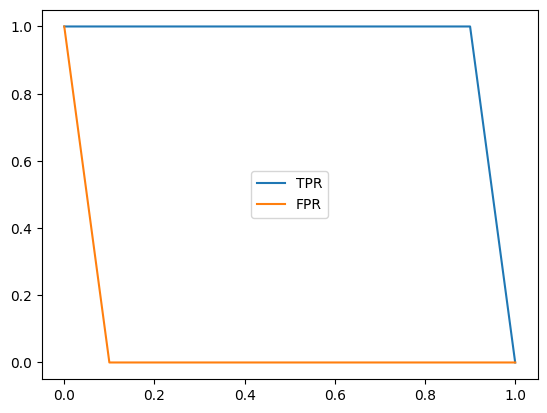

In [80]:
#plot the data
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()